In [1]:
#from ib_insync import *
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join
from helpers import *
from strategies import *

In [2]:
mypath = 'eric_jh_data/'
countries = sorted(['Australia', 'Japan', 'China'])
fx_dict = {'Australia':('eric_jh_data/Forex/AUD_USD_new.csv',0),
           'Japan':('eric_jh_data/Forex/USD_JPY_new.csv',1),
           'China':('eric_jh_data/Forex/USD_HKD_new.csv',1)}

list_pairs = []
for country in countries:
    countrypath = mypath + country
    adr_names =  [f for f in listdir(countrypath) if not isfile(join(countrypath, f))] #grab all adr names of the country
    for adr in sorted(adr_names):
        list_pairs.append((country, adr))

In [3]:
# Store ratios
for (country, adr) in list_pairs:
    ratio_geq_1, ratio = get_ratio(country, adr, fx_dict)
    if adr == "ACH_2600" or adr == "BGNE_6160":
        rounded_ratio = float('%.2g' % ratio)
    else:
        rounded_ratio = float('%.1g' % ratio)
    print("Country: {}, ADR_Stock: {}, Estimated Ratio (4 d.p.): {}, Implied Ratio (2 s.f.): {}".format(country, adr, ratio, rounded_ratio))
    ratio_df = pd.DataFrame({"ratio_geq_1" : [ratio_geq_1], "ratio" : [rounded_ratio]})
    ratio_df.to_csv(f'eric_jh_data/{country}/{adr}/ratio.csv')

Country: Australia, ADR_Stock: ATHE_ATH, Estimated Ratio (4 d.p.): 59.4889, Implied Ratio (2 s.f.): 60.0
Country: Australia, ADR_Stock: GENE_GTG, Estimated Ratio (4 d.p.): 595.5978, Implied Ratio (2 s.f.): 600.0
Country: Australia, ADR_Stock: IMMP_IMM, Estimated Ratio (4 d.p.): 9.9082, Implied Ratio (2 s.f.): 10.0
Country: Australia, ADR_Stock: IMRN_IMC, Estimated Ratio (4 d.p.): 39.4289, Implied Ratio (2 s.f.): 40.0
Country: Australia, ADR_Stock: JHX_JHX, Estimated Ratio (4 d.p.): 1.0043, Implied Ratio (2 s.f.): 1.0
Country: Australia, ADR_Stock: KZIA_KZA, Estimated Ratio (4 d.p.): 10.0346, Implied Ratio (2 s.f.): 10.0
Country: Australia, ADR_Stock: MESO_MSB, Estimated Ratio (4 d.p.): 5.0155, Implied Ratio (2 s.f.): 5.0
Country: Australia, ADR_Stock: PLL_PLL, Estimated Ratio (4 d.p.): 101.5788, Implied Ratio (2 s.f.): 100.0
Country: Australia, ADR_Stock: WBK_WBC, Estimated Ratio (4 d.p.): 0.9997, Implied Ratio (2 s.f.): 1.0
Country: China, ADR_Stock: ACH_2600, Estimated Ratio (4 d.p.)

This shows the empircally estimated ratio, and the implied ratio we shall assume.
These values corroborate with the select few we checked online, like GENE_GTG and BGNE_6160.

In [4]:
# date - date in local time
# All dates are in local time: so in sequential order (for each row), it will go stock_open, stock_close, adr_open, adr_close
# avg_bid_non_us_before - how much foreign currency we can buy with 1 USD, 1 minute before the Asian market opens
# avg_ask_non_us_before - how much foreign currency we would need to sell for 1 USD, 1 minute before the Asian market opens
# avg_non_us_before - average of avg_bid_non_us_before and avg_ask_non_us_before
# avg_bid_non_us_at - how much foreign currency we can buy with 1 USD, when the Asian market opens
# avg_ask_non_us_at - how much foreign currency we would need to sell for 1 USD, when the Asian market opens
# avg_non_us_at - average of avg_bid_non_us_at and avg_ask_non_us_at
# avg_bid_us_before - how much foreign currency we can buy with 1 USD, 1 minute before the US market opens
# avg_ask_us_before - how much foreign currency we would need to sell for 1 USD, 1 minute before the US market opens
# avg_us_before - average of avg_bid_us_before and avg_ask_us_before
# avg_bid_us_at - how much foreign currency we can buy with 1 USD, when the US market opens
# avg_ask_us_at - how much foreign currency we would need to sell for 1 USD, when the US market opens
# avg_us_at - average of avg_bid_us_at and avg_ask_us_at
# ir - foreign interest rate
# stock_num_per_unit - how many stocks we would buy for 1 "unit" of trade
# adr_num_per_unit - how many adr shares we would sell for 1 "unit" of trade

merged_df = data_processing(*list_pairs[1], fx_dict)
merged_df.head()

,date,adr_open,adr_close,adr_volume,stock_open,stock_close,stock_volume,avg_bid_non_us_before,avg_ask_non_us_before,avg_non_us_before,...,avg_bid_us_at,avg_ask_us_at,avg_us_at,ir,stock_num_per_unit,adr_num_per_unit,stock_open_per_unit,stock_close_per_unit,adr_open_per_unit,adr_close_per_unit
0,2015-04-10,18.08,17.36,1873,0.040,0.039,987003,1.296948,1.299612,1.298280,...,1.302409,1.305068,1.303738,NaN,600.0,1,24.0,23.4,18.08,17.36
1,2015-04-13,17.76,16.16,2762,0.039,0.039,1586945,1.303310,1.305987,1.304648,...,1.315530,1.318215,1.316872,NaN,600.0,1,23.4,23.4,17.76,16.16
2,2015-04-14,16.96,17.08,2545,0.036,0.038,2905099,1.316900,1.319606,1.318253,...,1.309820,1.312529,1.311174,NaN,600.0,1,21.6,22.8,16.96,17.08
3,2015-04-15,17.68,17.52,2106,0.039,0.038,2069419,1.312108,1.314822,1.313465,...,1.310301,1.312994,1.311647,NaN,600.0,1,23.4,22.8,17.68,17.52
4,2015-04-16,17.40,17.00,1068,0.038,0.036,2378678,1.301459,1.304133,1.302796,...,1.282035,1.284634,1.283335,NaN,600.0,1,22.8,21.6,17.40,17.00


Country: Australia, ADR_Stock: ATHE_ATH, Return: 0.15%, Hit Ratio: 88.64%, Max Drawdown: 0.03%
Country: Australia, ADR_Stock: GENE_GTG, Return: 2.18%, Hit Ratio: 81.13%, Max Drawdown: 1.94%
Country: Australia, ADR_Stock: IMMP_IMM, Return: 0.53%, Hit Ratio: 75.0%, Max Drawdown: 0.18%
Country: Australia, ADR_Stock: IMRN_IMC, Return: 1.07%, Hit Ratio: 83.78%, Max Drawdown: 0.02%
Country: Australia, ADR_Stock: JHX_JHX, Return: -0.18%, Hit Ratio: 38.61%, Max Drawdown: 0.19%
Country: Australia, ADR_Stock: KZIA_KZA, Return: 0.38%, Hit Ratio: 73.24%, Max Drawdown: 0.55%
Country: Australia, ADR_Stock: MESO_MSB, Return: 0.33%, Hit Ratio: 70.15%, Max Drawdown: 3.44%
Country: Australia, ADR_Stock: PLL_PLL, Return: 20.02%, Hit Ratio: 71.15%, Max Drawdown: 7.32%
Country: Australia, ADR_Stock: WBK_WBC, Return: -0.68%, Hit Ratio: 42.55%, Max Drawdown: 1.5%
Country: China, ADR_Stock: ACH_2600, Return: 0.15%, Hit Ratio: 49.41%, Max Drawdown: 0.1%
Country: China, ADR_Stock: BGNE_6160, Return: 36.79%, Hit

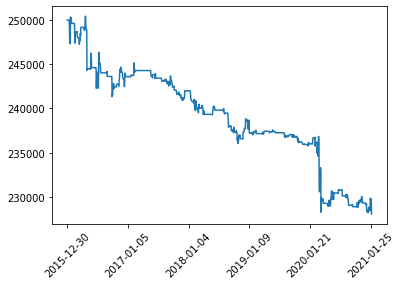

In [5]:
last_dates, last_portfolio_values = report_and_store_statistics(pairs_trade_v1, 'logs1.txt', list_pairs, fx_dict)
plot_returns(last_dates, last_portfolio_values)

Country: Australia, ADR_Stock: ATHE_ATH, Return: 0.19%, Hit Ratio: 82.61%, Max Drawdown: 0.02%
Country: Australia, ADR_Stock: GENE_GTG, Return: 2.81%, Hit Ratio: 79.73%, Max Drawdown: 0.38%
Country: Australia, ADR_Stock: IMMP_IMM, Return: 0.99%, Hit Ratio: 82.93%, Max Drawdown: 1.01%
Country: Australia, ADR_Stock: IMRN_IMC, Return: 0.06%, Hit Ratio: 80.0%, Max Drawdown: 0.01%
Country: Australia, ADR_Stock: JHX_JHX, Return: 0.14%, Hit Ratio: 48.39%, Max Drawdown: 0.05%
Country: Australia, ADR_Stock: KZIA_KZA, Return: 0.24%, Hit Ratio: 72.88%, Max Drawdown: 0.37%
Country: Australia, ADR_Stock: MESO_MSB, Return: 2.19%, Hit Ratio: 76.19%, Max Drawdown: 2.93%
Country: Australia, ADR_Stock: PLL_PLL, Return: 8.04%, Hit Ratio: 80.0%, Max Drawdown: 3.99%
Country: Australia, ADR_Stock: WBK_WBC, Return: 0.75%, Hit Ratio: 51.04%, Max Drawdown: 0.99%
Country: China, ADR_Stock: ACH_2600, Return: 0.15%, Hit Ratio: 53.04%, Max Drawdown: 0.16%
Country: China, ADR_Stock: BGNE_6160, Return: 4.46%, Hit Ra

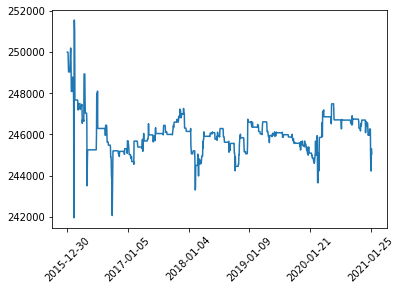

In [6]:
last_dates, last_portfolio_values = report_and_store_statistics(pairs_trade_v2, 'logs2.txt', list_pairs, fx_dict)
plot_returns(last_dates, last_portfolio_values)

Country: Australia, ADR_Stock: ATHE_ATH, Return: 0.2%, Hit Ratio: 85.0%, Max Drawdown: 0.03%
Country: Australia, ADR_Stock: GENE_GTG, Return: 3.71%, Hit Ratio: 79.07%, Max Drawdown: 1.92%
Country: Australia, ADR_Stock: IMMP_IMM, Return: 1.33%, Hit Ratio: 75.44%, Max Drawdown: 0.15%
Country: Australia, ADR_Stock: IMRN_IMC, Return: 1.1%, Hit Ratio: 80.0%, Max Drawdown: 0.02%
Country: Australia, ADR_Stock: JHX_JHX, Return: 0.22%, Hit Ratio: 44.16%, Max Drawdown: 0.09%
Country: Australia, ADR_Stock: KZIA_KZA, Return: 0.85%, Hit Ratio: 69.57%, Max Drawdown: 0.36%
Country: Australia, ADR_Stock: MESO_MSB, Return: 2.21%, Hit Ratio: 82.91%, Max Drawdown: 2.67%
Country: Australia, ADR_Stock: PLL_PLL, Return: 16.35%, Hit Ratio: 75.76%, Max Drawdown: 3.72%
Country: Australia, ADR_Stock: WBK_WBC, Return: -0.22%, Hit Ratio: 47.71%, Max Drawdown: 1.73%
Country: China, ADR_Stock: ACH_2600, Return: 0.08%, Hit Ratio: 52.07%, Max Drawdown: 0.17%
Country: China, ADR_Stock: BGNE_6160, Return: 21.88%, Hit R

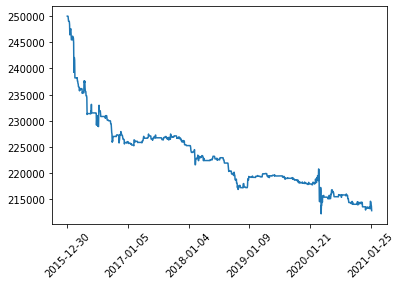

In [8]:
last_dates, last_portfolio_values = report_and_store_statistics(pairs_trade_v3a, 'logs3a.txt', list_pairs, fx_dict)
plot_returns(last_dates, last_portfolio_values)

Country: Australia, ADR_Stock: ATHE_ATH, Return: 0.15%, Hit Ratio: 87.72%, Max Drawdown: 0.03%
Country: Australia, ADR_Stock: GENE_GTG, Return: 3.68%, Hit Ratio: 82.5%, Max Drawdown: 1.93%
Country: Australia, ADR_Stock: IMMP_IMM, Return: 0.93%, Hit Ratio: 75.0%, Max Drawdown: 0.1%
Country: Australia, ADR_Stock: IMRN_IMC, Return: 1.13%, Hit Ratio: 80.43%, Max Drawdown: 0.02%
Country: Australia, ADR_Stock: JHX_JHX, Return: 0.13%, Hit Ratio: 43.05%, Max Drawdown: 0.15%
Country: Australia, ADR_Stock: KZIA_KZA, Return: 1.75%, Hit Ratio: 70.79%, Max Drawdown: 0.07%
Country: Australia, ADR_Stock: MESO_MSB, Return: 2.26%, Hit Ratio: 80.83%, Max Drawdown: 2.66%
Country: Australia, ADR_Stock: PLL_PLL, Return: 22.56%, Hit Ratio: 72.31%, Max Drawdown: 5.26%
Country: Australia, ADR_Stock: WBK_WBC, Return: 0.6%, Hit Ratio: 48.91%, Max Drawdown: 1.06%
Country: China, ADR_Stock: ACH_2600, Return: -0.19%, Hit Ratio: 52.17%, Max Drawdown: 0.37%
Country: China, ADR_Stock: BGNE_6160, Return: 27.66%, Hit R

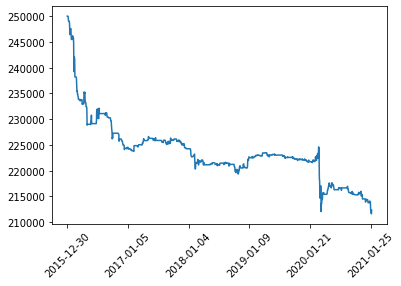

In [10]:
last_dates, last_portfolio_values = report_and_store_statistics(pairs_trade_v3b, 'logs3b.txt', list_pairs, fx_dict)
plot_returns(last_dates, last_portfolio_values)